In [2]:
import numpy as np
import pyintersection as pyi
import matplotlib.pyplot as plt

In [3]:
def plot_rpoints(axis, rpoints, c=None, s=None, **kwargs):
    ix, iy, iz = rpoints[:, 4:5], rpoints[:, 5:6], rpoints[:, 6:7]
    axis.scatter(ix, iy, iz, c=c, s=s, **kwargs)
    
def plot_mpoints(axis, mpoints, c=None, s=None, **kwargs):
    ix, iy, iz = mpoints[:, 2:3], mpoints[:, 3:4], mpoints[:, 4:5]
    axis.scatter(ix, iy, iz, c=c, s=s, **kwargs)
    
def plot_rawpoints(axis, points, c=None, s=None, **kwargs):
    ix, iy, iz = points[:, 0:1], points[:, 1:2], points[:, 2:3]
    axis.scatter(ix, iy, iz, c=c, s=s, **kwargs)
    
def plot_surface(axis, mesh, **kwargs):
    ix, iy, iz = mesh
    axis.plot_surface(ix, iy, iz, **kwargs)

In [4]:
def create_plain_mesh(n, D=0, L=7, W=7):
    kx, ky = 31, 31
 
    n = n / np.linalg.norm(n)
    x, y = np.mgrid[-L:L:kx*1j, -W:W:ky*1j]
    A, B, C = n
    z = -(A*x+B*y+D)/C
    return (x, y, z)

In [5]:
def create_manifold_generator(generate_point=None, points_count=40):
    scaling = 1
    def generator(n, t, atol, points_count=points_count):
        size = int(points_count**0.5)
        twidth = atol * scaling
        nwidth = atol * scaling
        ts = np.linspace(t - twidth / 2, t + twidth / 2, size)
        ns = np.linspace(n - nwidth / 2, n + nwidth / 2, size)
        res = np.zeros((len(ns) * len(ts), 5))

        for i, n in enumerate(ns):
            for j, t in enumerate(ts):
                res[j + len(ts) * i] = n, t, *generate_point(n, t)
        return res
    return generator

def create_point_generator(vec_par, vec_offset):
    def generator(n, t):
        return vec_offset * n + vec_par * t
    return generator

In [6]:
### Generator for first plain or "A" manifold
a_norm = np.array([1, 1, 1]) # Norm vector of the plane
a_par = np.array([1, -0.5, -0.5]) # Some orthogonal to norm vector
a_offset = np.array([0, 1, -1]) # One another orthogonal to previous other vectors
a_point_generator = create_point_generator(a_par, a_offset)
a_manifold_generator = create_manifold_generator(a_point_generator)
a_plain_mesh = create_plain_mesh(a_norm, L=4, W=4)

### Generator for second plain or "B" manifold
b_norm = np.array([1, 0, 1]) # Norm vector of the plane
b_par = np.array([1, 0, -1]) # Some orthogonal to norm vector
b_offset = np.array([0, 1, 0]) # One another orthogonal to previous other vectors
b_point_generator = create_point_generator(b_par, b_offset)
b_manifold_generator = create_manifold_generator(b_point_generator)
b_plain_mesh = create_plain_mesh(b_norm, L=4, W=4)

# 1. Find intersection

## 1.1. Plot initial manifolds

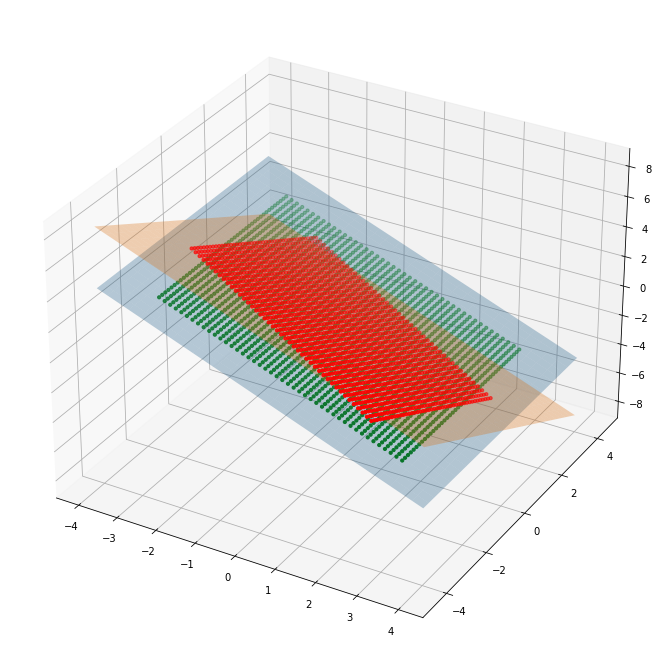

In [25]:
a = a_manifold_generator(0, 0, 6, points_count=2000)
b = b_manifold_generator(0, 0, 6, points_count=2000)

fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot(111, projection='3d')
# Plot surfaces for two planes
plot_surface(axis, b_plain_mesh, alpha=0.3)
plot_surface(axis, a_plain_mesh, alpha=0.3)
# Plot points form initial manifolds
plot_mpoints(axis, a, c='r', s=10)
plot_mpoints(axis, b, c='g', s=10)

## 1.2. Find intersection

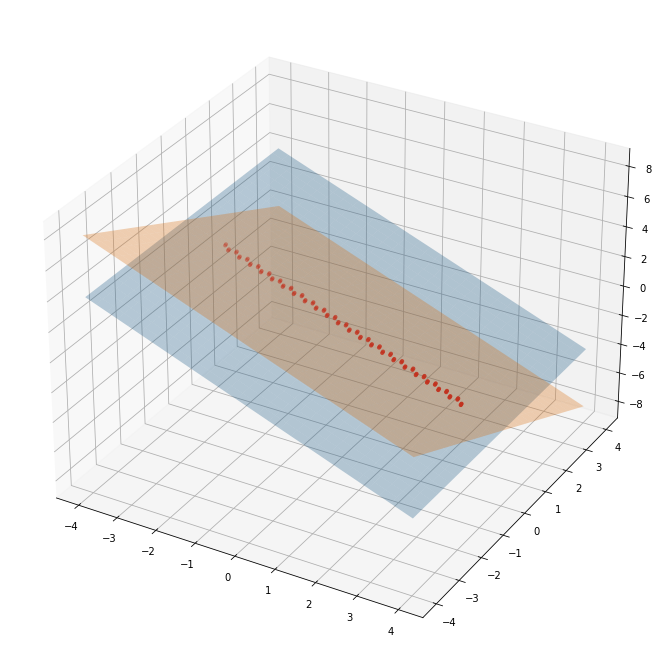

In [28]:
_, rpoints, _ = pyi.intersect3d(a, b, 0.5)

fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot(111, projection='3d')
# Plot surfaces for two planes
plot_surface(axis, b_plain_mesh, alpha=0.3)
plot_surface(axis, a_plain_mesh, alpha=0.3)
# Plot points form intersection
plot_rpoints(axis, rpoints, c='r', s=10)